# Modeling

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load-Data-from-Pickle-Files" data-toc-modified-id="Load-Data-from-Pickle-Files-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data from Pickle Files</a></span></li><li><span><a href="#XGBoost-Trial-Run" data-toc-modified-id="XGBoost-Trial-Run-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>XGBoost Trial Run</a></span><ul class="toc-item"><li><span><a href="#Split-past-and-future-data" data-toc-modified-id="Split-past-and-future-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Split <code>past</code> and <code>future</code> data</a></span></li><li><span><a href="#Split-train-and-validation-data" data-toc-modified-id="Split-train-and-validation-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Split train and validation data</a></span></li><li><span><a href="#Train-XGB-model" data-toc-modified-id="Train-XGB-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Train XGB model</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature importance</a></span></li><li><span><a href="#Create-a-submission" data-toc-modified-id="Create-a-submission-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Create a submission</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data from Pickle Files

In [2]:
import pickle
with open('scratch/variables.pkl', 'rb') as f:
    (cat_cols, num_cols, bin_cols, id_col, target_col, 
    cat2int_cols, cat2int_encoders, cat2onehot_cols, 
    cat2onehot_sparse) = pickle.load(f)

In [3]:
full = pd.read_pickle('scratch/full_engineered.pkl')

## XGBoost Trial Run

Just use the numeric columns and integer-encoded categoricals...

In [4]:
use_cols = num_cols + cat2int_cols

### Split `past` and `future` data

In [5]:
past = full.query('dataset=="past"')
future  = full.query('dataset=="future"')

print('Past data set:')
display(past.shape)
display(past.head())

print('Future data set:')
display(future.shape)
display(future.head())

Past data set:


(252108, 51)

,dataset,air_store_id,id,visit_date,visitors,weekday,year,month,day_of_year,days_in_month,...,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
0,past,air_ba937bf13d40fb24,air_ba937bf13d40fb24_2016-01-13,2016-01-13,25,2,2016,1,13,31,...,4,62,16,31,7,29,77,144,4222,7860
1,past,air_ba937bf13d40fb24,air_ba937bf13d40fb24_2016-01-14,2016-01-14,32,3,2016,1,14,31,...,4,62,16,31,7,29,77,144,4223,7862
2,past,air_ba937bf13d40fb24,air_ba937bf13d40fb24_2016-01-15,2016-01-15,29,4,2016,1,15,31,...,4,62,16,31,7,29,77,144,4224,7864
3,past,air_ba937bf13d40fb24,air_ba937bf13d40fb24_2016-01-16,2016-01-16,22,5,2016,1,16,31,...,4,62,16,31,7,29,77,144,4225,7866
4,past,air_ba937bf13d40fb24,air_ba937bf13d40fb24_2016-01-18,2016-01-18,6,0,2016,1,18,31,...,4,62,16,31,7,29,77,144,4220,7858


Future data set:


(32019, 51)

,dataset,air_store_id,id,visit_date,visitors,weekday,year,month,day_of_year,days_in_month,...,air_genre_name_int,air_area_name_int,hpg_genre_name_int,hpg_area_name_int,Todofuken_int,city_int,street_int,area_genre_int,store_weekday_int,store_weekday_holiday_int
252108,future,air_00a91d42b08b08d9,air_00a91d42b08b08d9_2017-04-23,2017-04-23,0,6,2017,4,113,30,...,6,44,16,31,7,5,45,102,6,11
252109,future,air_00a91d42b08b08d9,air_00a91d42b08b08d9_2017-04-24,2017-04-24,0,0,2017,4,114,30,...,6,44,16,31,7,5,45,102,0,0
252110,future,air_00a91d42b08b08d9,air_00a91d42b08b08d9_2017-04-25,2017-04-25,0,1,2017,4,115,30,...,6,44,16,31,7,5,45,102,1,2
252111,future,air_00a91d42b08b08d9,air_00a91d42b08b08d9_2017-04-26,2017-04-26,0,2,2017,4,116,30,...,6,44,16,31,7,5,45,102,2,3
252112,future,air_00a91d42b08b08d9,air_00a91d42b08b08d9_2017-04-27,2017-04-27,0,3,2017,4,117,30,...,6,44,16,31,7,5,45,102,3,5


### Split train and validation data

In [6]:
train_selector = past.visit_date.between('2016-04-01', '2017-03-09')
X_train = past[train_selector][use_cols]
y_train = past[train_selector][target_col].apply(np.log1p)    # apply np.log1p() (log(1+x)) to visitors count, to correct for high skewness

print('Training set dimensions...')
print('- X_train:', X_train.shape)
print('- y_train:', y_train.shape)

Training set dimensions...
- X_train: (197315, 30)
- y_train: (197315,)


In [7]:
val_selector = past.visit_date > '2016-04-01'
X_val = past[val_selector][use_cols]
y_val = past[val_selector][target_col].apply(np.log1p)

print('Validation set dimensions...')
print('- X_val:', X_val.shape)
print('- y_val:', y_val.shape)

Validation set dimensions...
- X_val: (228610, 30)
- y_val: (228610,)


Why log-tranform `y`s?

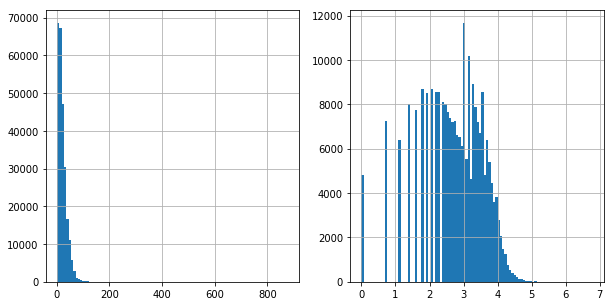

In [9]:
fg, ax = plt.subplots(nrows=1, ncols=2, figsize=[10,5])
past[target_col].hist(bins=100, ax=ax[0])
past[target_col].apply(np.log).hist(bins=100, ax=ax[1])

### Train XGB model

In [10]:
import xgboost as xgb

In [11]:
%%time

xg_train = xgb.DMatrix(X_train, label=y_train)
xg_val = xgb.DMatrix(X_val, label=y_val)

watchlist = [ (xg_train, 'train'), (xg_val, 'eval') ]

try_xgb_params = {'colsample_bytree': 0.7,
                  'eta': 0.1,
                  'gamma': 1,
                  'max_depth': 10,
                  'min_child_weight': 3,
                  'nthread': 8,
                  'objective': 'reg:linear',
                  'seed': 2018,
                  'subsample': 1}

model = xgb.train(params=try_xgb_params,
                  dtrain=xg_train, 
                  num_boost_round=100000, 
                  evals=watchlist,
                  early_stopping_rounds=50,
                  verbose_eval=1000
                 )

best_iteration = model.best_iteration
best_score = model.best_score

print ('best_score: {}, best_iteration: {}'.format(best_score, best_iteration))

[0]	train-rmse:2.19658	eval-rmse:2.20422
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 50 rounds.
[1000]	train-rmse:0.405889	eval-rmse:0.418759
[2000]	train-rmse:0.396368	eval-rmse:0.411137
[3000]	train-rmse:0.386038	eval-rmse:0.403093
Stopping. Best iteration:
[2977]	train-rmse:0.386038	eval-rmse:0.403093

best_score: 0.403093, best_iteration: 2977
CPU times: user 18min 43s, sys: 23.2 s, total: 19min 7s
Wall time: 6min 8s


### Feature importance

,importance
day_of_year,0.146817
days_since_20160101,0.111153
mean_visitors,0.089577
max_visitors,0.071516
store_weekday_int,0.066856
median_visitors,0.050465
air_store_id_int,0.048432
min_visitors,0.032809
store_weekday_holiday_int,0.029253
latitude_air,0.029159


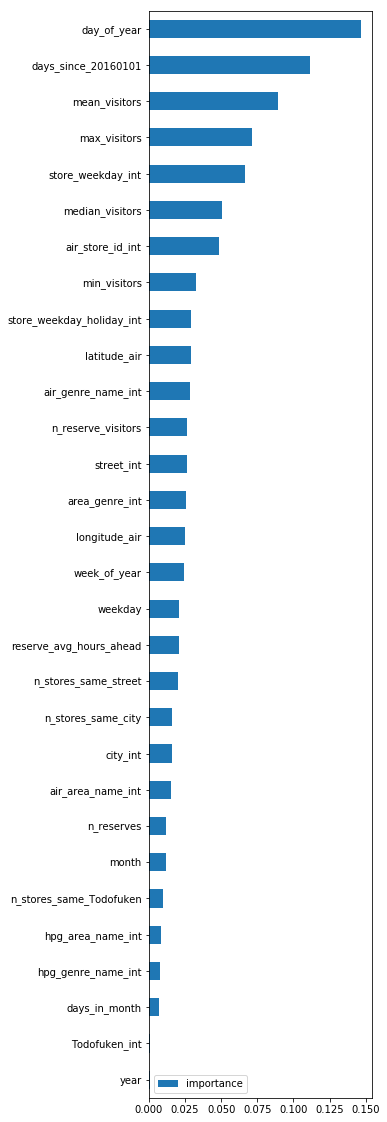

In [14]:
feature_importance = pd.DataFrame.from_dict(model.get_fscore(), orient='index')
feature_importance.columns = ['importance']
feature_importance.importance = feature_importance.importance / feature_importance.importance.sum()
feature_importance.sort_values(by='importance').head(30).plot.barh(figsize=[4,20])
feature_importance.sort_values(by='importance', ascending=False).head(30)

### Create a submission

In [15]:
# train_selector = past.visit_date.between('2016-04-01', '2017-03-09')
X_train = past[use_cols]
y_train = past[target_col].apply(np.log1p)    # apply np.log1p() (log(1+x)) to visitors count, to correct for high skewness

print('Training set dimensions...')
print('- X_train:', X_train.shape)
print('- y_train:', y_train.shape)

Training set dimensions...
- X_train: (252108, 30)
- y_train: (252108,)


In [16]:
%%time
model = xgb.train(params=try_xgb_params, 
                  dtrain=xgb.DMatrix(X_train, label=y_train), 
                  num_boost_round=best_iteration*2
                 )

In [25]:
future[target_col] = model.predict(xgb.DMatrix(future[use_cols]))
future[target_col] = future[target_col].apply(np.expm1).clip(lower=0.)

/Users/guozhenli/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/guozhenli/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
sub = future[[id_col, target_col]].copy()

sub.to_csv('output/sub_xgb_try.csv', index=False)